In [1]:
import platform
from matplotlib import font_manager, rc

In [2]:
path = "C:/Windows/Fonts/malgun.ttf"
if platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system()=="Darwin":
    rc('font', family='AppleGothic')
else:
    print("Unknown System")

In [3]:
import os
import FinanceDataReader as fdr
from tqdm import tqdm
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('20210104_20211119_data_interpolate.csv')
df.head()

,Date,exchange_rate,kospi,kosdaq,kospi100,dow,nasdaq,sp500,미국채10년-2년,BTC,Gold,Oil,US10Y,US2Y
0,2021-01-04,1086.48,2944.45,977.62,3052.74,30223.89,12698.4,3700.65,0.8009,36499000.0,37.10,32.38,0.918,0.1171
1,2021-01-05,1086.42,2990.57,985.76,3099.42,30391.60,12819.0,3726.86,0.8320,37962000.0,37.18,33.94,0.955,0.1230
2,2021-01-06,1087.93,2968.21,981.39,3070.05,30829.40,12740.8,3748.14,0.9002,40731000.0,36.60,34.11,1.039,0.1388
3,2021-01-07,1094.28,3031.68,988.86,3139.48,31041.13,13067.5,3803.79,0.9402,44575000.0,36.48,34.53,1.081,0.1408
4,2021-01-08,1092.93,3152.18,987.79,3293.96,31097.97,13202.0,3824.68,0.9821,47241000.0,35.26,35.43,1.119,0.1369


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           230 non-null    object 
 1   exchange_rate  230 non-null    float64
 2   kospi          230 non-null    float64
 3   kosdaq         230 non-null    float64
 4   kospi100       230 non-null    float64
 5   dow            230 non-null    float64
 6   nasdaq         230 non-null    float64
 7   sp500          230 non-null    float64
 8   미국채10년-2년      230 non-null    float64
 9   BTC            230 non-null    float64
 10  Gold           230 non-null    float64
 11  Oil            230 non-null    float64
 12  US10Y          230 non-null    float64
 13  US2Y           230 non-null    float64
dtypes: float64(13), object(1)
memory usage: 25.3+ KB


In [6]:
# plt.figure(figsize=(12,10))
# plt.xticks(fontsize=15)
# plt.yticks(fontsize=15)
# sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f', cbar=False, annot_kws={"size": 20})

### 종목 정보 불러오기

In [7]:
path = '../data'
list_name = 'Stock_List.csv'
stock_list = pd.read_csv(os.path.join(path,list_name))
stock_list.head()

,종목명,종목코드,상장시장
0,삼성전자,5930,KOSPI
1,SK하이닉스,660,KOSPI
2,NAVER,35420,KOSPI
3,카카오,35720,KOSPI
4,삼성바이오로직스,207940,KOSPI


In [8]:
# 종목 코드 6자리로 맞추기
stock_list['종목코드'] = stock_list["종목코드"].astype(str).str.zfill(6)
stock_list

,종목명,종목코드,상장시장
0,삼성전자,005930,KOSPI
1,SK하이닉스,000660,KOSPI
2,NAVER,035420,KOSPI
3,카카오,035720,KOSPI
4,삼성바이오로직스,207940,KOSPI
...,...,...,...
365,맘스터치,220630,KOSDAQ
366,다날,064260,KOSDAQ
367,제이시스메디칼,287410,KOSDAQ
368,크리스에프앤씨,110790,KOSDAQ


In [9]:
start_date = '20210104'
end_date = '20211119'

In [10]:
Business_days = pd.DataFrame(pd.date_range(start_date,end_date,freq='B'), columns = ['Date'])

In [11]:
# 삼성전자 테스트
code='005930'
data = fdr.DataReader(code, start = start_date, end = end_date)[['Close']].reset_index()
data = pd.merge(Business_days, data, how = 'outer')
data.Close = data.Close.ffill()

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 230 entries, 0 to 229
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    230 non-null    datetime64[ns]
 1   Close   230 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.4 KB


In [13]:
data['Date'] = data['Date'].astype('str')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 230 entries, 0 to 229
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    230 non-null    object 
 1   Close   230 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.4+ KB


In [14]:
data = pd.merge(data, df, on='Date')
data.head()

,Date,Close,exchange_rate,kospi,kosdaq,kospi100,dow,nasdaq,sp500,미국채10년-2년,BTC,Gold,Oil,US10Y,US2Y
0,2021-01-04,83000.0,1086.48,2944.45,977.62,3052.74,30223.89,12698.4,3700.65,0.8009,36499000.0,37.10,32.38,0.918,0.1171
1,2021-01-05,83900.0,1086.42,2990.57,985.76,3099.42,30391.60,12819.0,3726.86,0.8320,37962000.0,37.18,33.94,0.955,0.1230
2,2021-01-06,82200.0,1087.93,2968.21,981.39,3070.05,30829.40,12740.8,3748.14,0.9002,40731000.0,36.60,34.11,1.039,0.1388
3,2021-01-07,82900.0,1094.28,3031.68,988.86,3139.48,31041.13,13067.5,3803.79,0.9402,44575000.0,36.48,34.53,1.081,0.1408
4,2021-01-08,88800.0,1092.93,3152.18,987.79,3293.96,31097.97,13202.0,3824.68,0.9821,47241000.0,35.26,35.43,1.119,0.1369


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 230 entries, 0 to 229
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           230 non-null    object 
 1   Close          230 non-null    float64
 2   exchange_rate  230 non-null    float64
 3   kospi          230 non-null    float64
 4   kosdaq         230 non-null    float64
 5   kospi100       230 non-null    float64
 6   dow            230 non-null    float64
 7   nasdaq         230 non-null    float64
 8   sp500          230 non-null    float64
 9   미국채10년-2년      230 non-null    float64
 10  BTC            230 non-null    float64
 11  Gold           230 non-null    float64
 12  Oil            230 non-null    float64
 13  US10Y          230 non-null    float64
 14  US2Y           230 non-null    float64
dtypes: float64(14), object(1)
memory usage: 28.8+ KB


In [23]:
stock_name = stock_list.loc[stock_list['종목코드'] == code, '종목명']
stock_name

0    삼성전자
Name: 종목명, dtype: object

In [24]:
str(stock_name)

'0    삼성전자\nName: 종목명, dtype: object'

In [30]:
str(stock_name).split('\n')

['0    삼성전자', 'Name: 종목명, dtype: object']

In [31]:
str(stock_name).split('\n')[0]

'0    삼성전자'

In [34]:
mod_stock_name = str(stock_name).split('\n')[0]
mod_stock_name

'0    삼성전자'

<AxesSubplot:title={'center':'0    삼성전자'}>

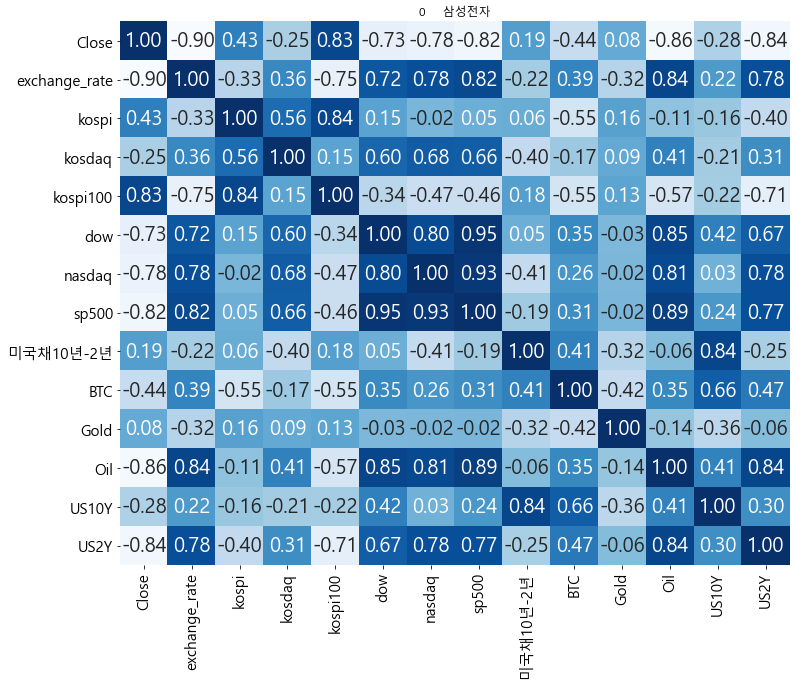

In [35]:
plt.figure(figsize=(12,10))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title(f'{mod_stock_name}')
sns.heatmap(data.corr(), cmap='Blues', annot=True, fmt='.2f', cbar=False, annot_kws={"size": 20})

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:02<00:00,  2.38it/s]


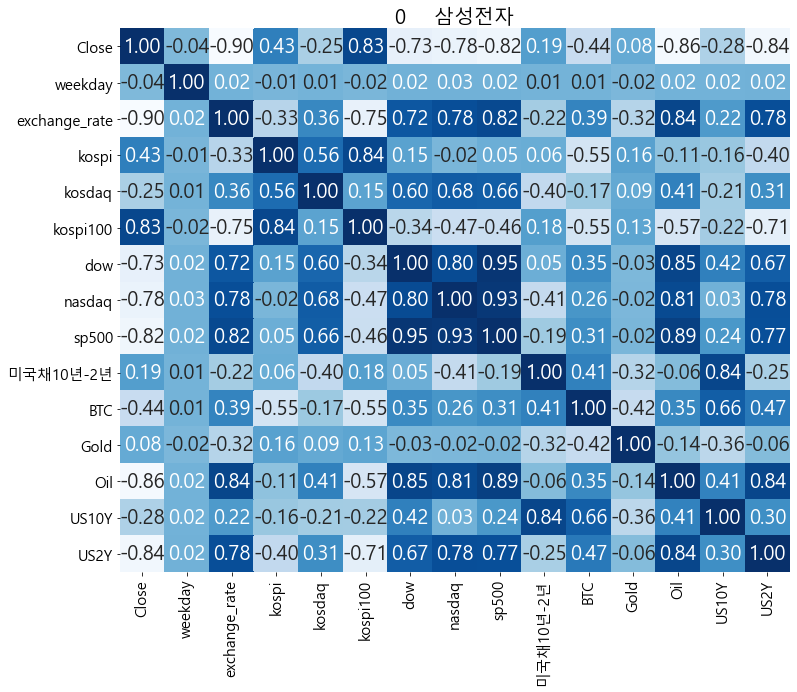

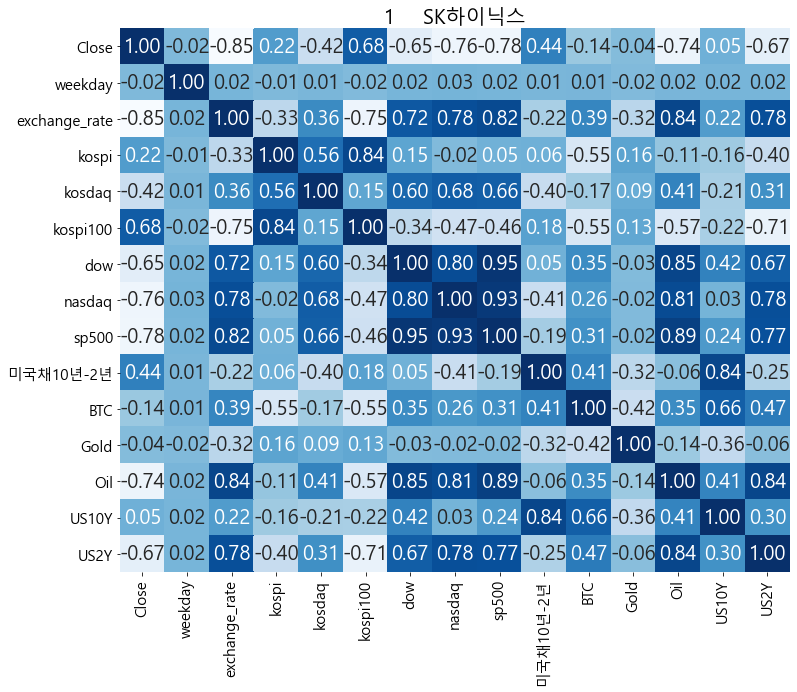

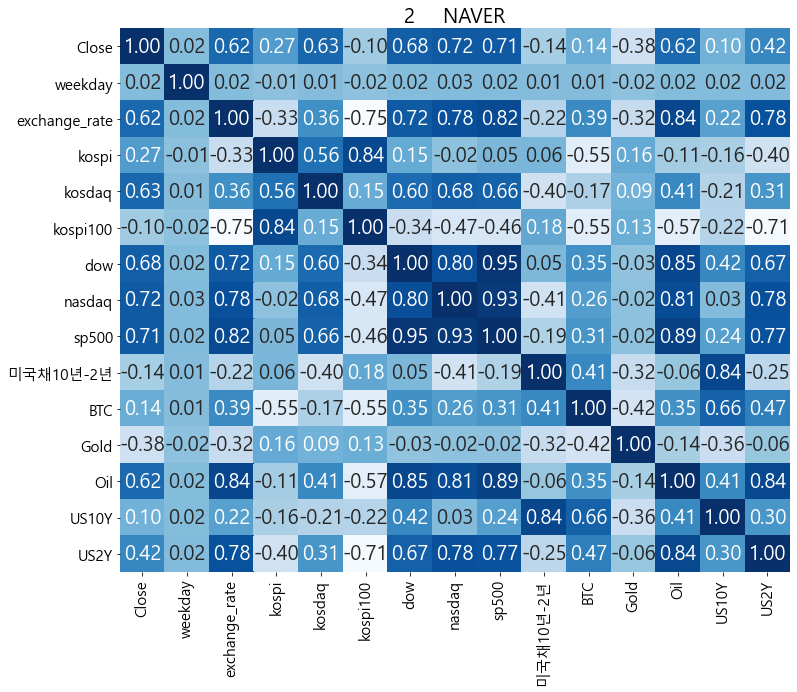

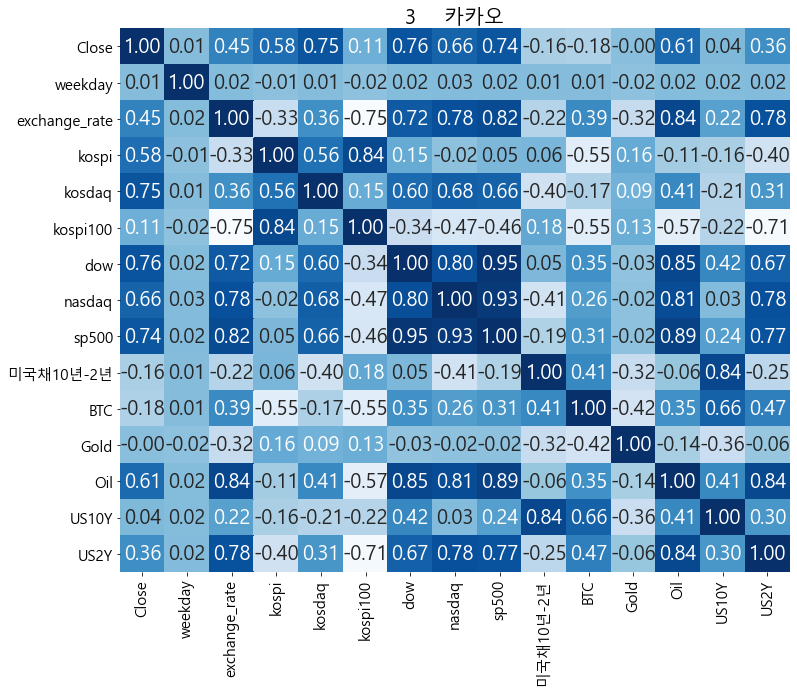

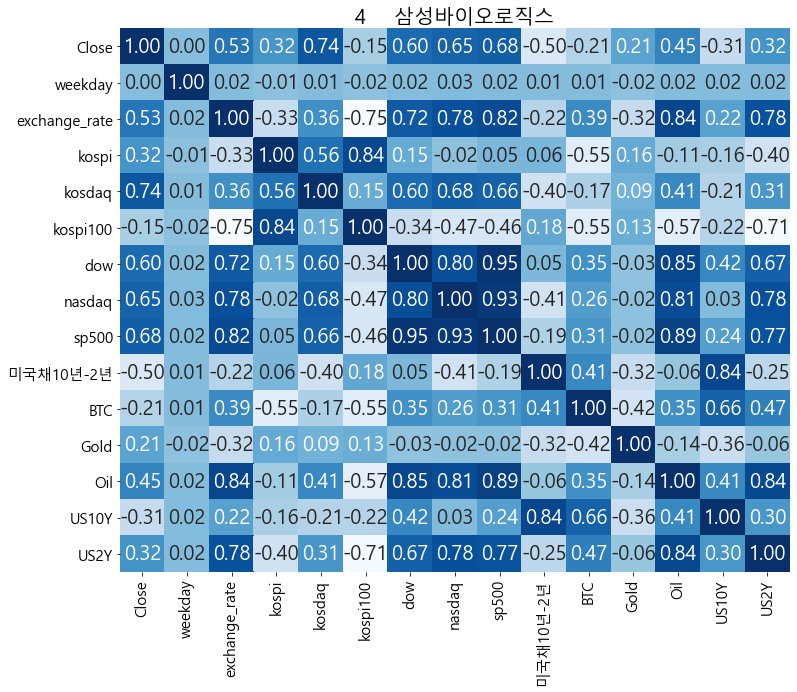

In [38]:
for code in tqdm(stock_list['종목코드'].values[:5]):
    data = fdr.DataReader(code, start = start_date, end = end_date)[['Close']].reset_index()
    data = pd.merge(Business_days, data, how = 'outer')
    data['weekday'] = data.Date.apply(lambda x : x.weekday())
    data['weeknum'] = data.Date.apply(lambda x : x.strftime('%V'))
    data.Close = data.Close.ffill()
    
    data['Date'] = data['Date'].astype('str')
    data = pd.merge(data, df, on='Date')
    
    stock_name = stock_list.loc[stock_list['종목코드'] == code, '종목명']
    mod_stock_name = str(stock_name).split('\n')[0]
    plt.figure(figsize=(12,10))
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.title(f'{mod_stock_name}', fontdict={'fontsize':20})
    sns.heatmap(data.corr(), cmap='Blues', annot=True, fmt='.2f', cbar=False, annot_kws={"size": 20})

In [39]:
stock_list

,종목명,종목코드,상장시장
0,삼성전자,005930,KOSPI
1,SK하이닉스,000660,KOSPI
2,NAVER,035420,KOSPI
3,카카오,035720,KOSPI
4,삼성바이오로직스,207940,KOSPI
...,...,...,...
365,맘스터치,220630,KOSDAQ
366,다날,064260,KOSDAQ
367,제이시스메디칼,287410,KOSDAQ
368,크리스에프앤씨,110790,KOSDAQ


In [44]:
data1 = fdr.DataReader('005930', start=start_date, end=end_date)

In [45]:
data1

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2021-01-04,81000,84400,80200,83000,38655276,0.024691
2021-01-05,81600,83900,81600,83900,35335669,0.010843
2021-01-06,83300,84500,82100,82200,42089013,-0.020262
2021-01-07,82800,84200,82700,82900,32644642,0.008516
2021-01-08,83300,90000,83000,88800,59013307,0.071170
...,...,...,...,...,...,...
2021-11-15,71700,71900,70900,71400,12420710,0.011331
2021-11-16,71500,72000,71300,71300,10919239,-0.001401
2021-11-17,71300,71600,70600,70700,11027606,-0.008415


In [46]:
data2 = fdr.DataReader('000660', start=start_date, end=end_date)

In [47]:
data2

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2021-01-04,124500,128000,120500,126000,7995016,0.063291
2021-01-05,124500,132500,124000,130500,7180224,0.035714
2021-01-06,132500,137000,130000,131000,8525749,0.003831
2021-01-07,132500,137500,131500,134500,5981299,0.026718
2021-01-08,136000,138000,132500,138000,8713010,0.026022
...,...,...,...,...,...,...
2021-11-15,108500,111500,108000,111000,4701568,0.042254
2021-11-16,111000,113000,109000,112000,3767311,0.009009
2021-11-17,113000,113000,110000,110500,3062491,-0.013393


In [48]:
data_mean = (data1['Close'] + data2['Close']) / 2

In [50]:
print(type(data_mean), data_mean)

<class 'pandas.core.series.Series'> Date
2021-01-04    104500.0
2021-01-05    107200.0
2021-01-06    106600.0
2021-01-07    108700.0
2021-01-08    113400.0
                ...   
2021-11-15     91200.0
2021-11-16     91650.0
2021-11-17     90600.0
2021-11-18     90100.0
2021-11-19     91350.0
Name: Close, Length: 219, dtype: float64


In [56]:
# 1번째 종목(삼성전자) 종가를 종목 총합에 담기
Business_days = pd.DataFrame(pd.date_range(start_date,end_date,freq='B'), columns = ['Date'])
data = fdr.DataReader('005930', start=start_date, end=end_date)[['Close']].reset_index()
data = pd.merge(Business_days, data, how = 'outer')
data.Close = data.Close.interpolate()
stock_close_sum = data
stock_close_sum

,Date,Close
0,2021-01-04,83000.0
1,2021-01-05,83900.0
2,2021-01-06,82200.0
3,2021-01-07,82900.0
4,2021-01-08,88800.0
...,...,...
225,2021-11-15,71400.0
226,2021-11-16,71300.0
227,2021-11-17,70700.0
228,2021-11-18,70200.0


In [57]:
Business_days = pd.DataFrame(pd.date_range(start_date,end_date,freq='B'), columns = ['Date'])
data = fdr.DataReader('000660', start=start_date, end=end_date)[['Close']].reset_index()
data = pd.merge(Business_days, data, how = 'outer')
data.Close = data.Close.interpolate()
stock_close_sum['Close'] += data['Close']
stock_close_sum

,Date,Close
0,2021-01-04,209000.0
1,2021-01-05,214400.0
2,2021-01-06,213200.0
3,2021-01-07,217400.0
4,2021-01-08,226800.0
...,...,...
225,2021-11-15,182400.0
226,2021-11-16,183300.0
227,2021-11-17,181200.0
228,2021-11-18,180200.0


# 370개 종목 종가 평균으로 상관계수 그래프 만들기

In [ ]:
# 1번째 종목(삼성전자) 종가를 종목 총합에 담기
Business_days = pd.DataFrame(pd.date_range(start_date,end_date,freq='B'), columns = ['Date'])
data = fdr.DataReader('005930', start=start_date, end=end_date)[['Close']].reset_index()
data = pd.merge(Business_days, data, how = 'outer')
data.Close = data.Close.interpolate()
stock_close_sum = data
stock_close_sum

In [59]:
# 2번째 종목부터 불러오기
for code in tqdm(stock_list['종목코드'][1:]):
    data = fdr.DataReader(code, start = start_date, end = end_date)[['Close']].reset_index()
    data = pd.merge(Business_days, data, how = 'outer')
    data.Close = data.Close.interpolate()
    stock_close_sum['Close'] += data['Close']

100%|████████████████████████████████████████████████████████████████████████████████| 369/369 [01:11<00:00,  5.19it/s]


In [60]:
stock_close_sum

,Date,Close
0,2021-01-04,3.130015e+07
1,2021-01-05,3.168821e+07
2,2021-01-06,3.149371e+07
3,2021-01-07,3.201293e+07
4,2021-01-08,3.253024e+07
...,...,...
225,2021-11-15,3.304780e+07
226,2021-11-16,3.314291e+07
227,2021-11-17,3.279402e+07
228,2021-11-18,3.275112e+07


In [61]:
# 모든 종목 종가 평균내고, 외부 자료와 합치기
stock_close_sum['Close'] = stock_close_sum['Close'] / 370
stock_close_sum['Date'] = stock_close_sum['Date'].astype('str')
stock_close_mean_data = pd.merge(stock_close_sum, df, on='Date')

<AxesSubplot:title={'center':'모든 종목 평균과 외부자료 상관계수'}>

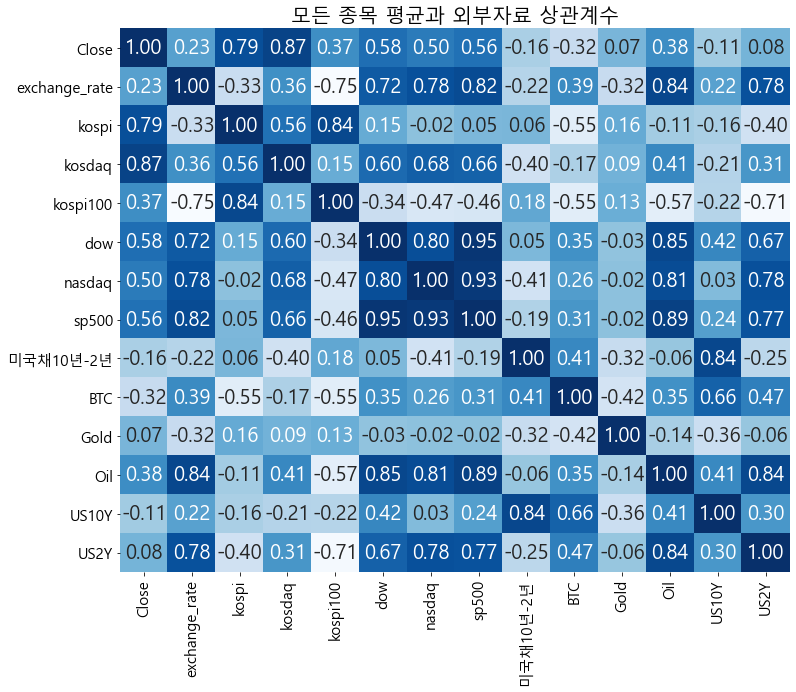

In [63]:
# 모든 종목 종가 평균과 외부 자료 상관계수 그래프
plt.figure(figsize=(12,10))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('모든 종목 평균과 외부자료 상관계수', fontdict={'fontsize':20})
sns.heatmap(stock_close_mean_data.corr(), cmap='Blues', annot=True, fmt='.2f', cbar=False, annot_kws={"size": 20})